In [1]:
import os.path
import sys

import os

# Récupère le chemin d'accès parent de sys.path[0]
parent_dir = os.path.dirname(sys.path[0])

sys.path.append(os.path.abspath(parent_dir))
import importlib
import algorithmes
importlib.reload(algorithmes)
from algorithmes import *
import random
import mesa
import bisect

import gym
import numpy as np
import random
import tensorflow as tf
from collections import deque


In [2]:
nombre_client  = 10

STATE_SIZE = 6400
ACTION_SIZE = 3
LEARNING_RATE = 0.001
GAMMA = 0.99
BATCH_SIZE = 32
MEMORY_SIZE = 1000000


In [3]:
  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [4]:
# Extraire tous les arcs de la route
route = [[0,1,2,3,4],[8,6,7],[5,9]]
arcs_voiture = set()
for sous_route in route:
    sous_route = [0]+sous_route+[0]
    arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

# Initialiser la matrice d'adjacence avec des zéros
n = max(list(itertools.chain.from_iterable(route)))+1
matrice_adj = [[0]*n for _ in range(n)]

# Mettre à jour les valeurs correspondantes à chaque arc
for i, j in arcs_voiture:
    matrice_adj[i][j] = 1
    #matrice_adj[i][j] = matrice_temps_Cij[i][j]
     
    
print(np.array(matrice_adj))

[[1 1 0 0 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [6]:
def get_matrice_adjacence(route):
     

    # Extraire tous les arcs de la route
    arcs_voiture = set()
    for sous_route in route:
        sous_route = [-1]+sous_route+[-1]
        arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

    # Initialiser la matrice d'adjacence avec des zéros
    n = max(list(itertools.chain.from_iterable(route)))+2
    matrice_adj = [[0]*n for _ in range(n)]

    # Mettre à jour les valeurs correspondantes à chaque arc
    for i, j in arcs_voiture:
        matrice_adj[i+1][j+1] = 1
        #matrice_adj[i+1][j+1] = matrice_temps_Cij[i][j]
        
        
    
    return(np.array(matrice_adj))


In [7]:
route = [[0,1,2,3,4],[8,6,7],[5,9]]

get_matrice_adjacence(route)

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

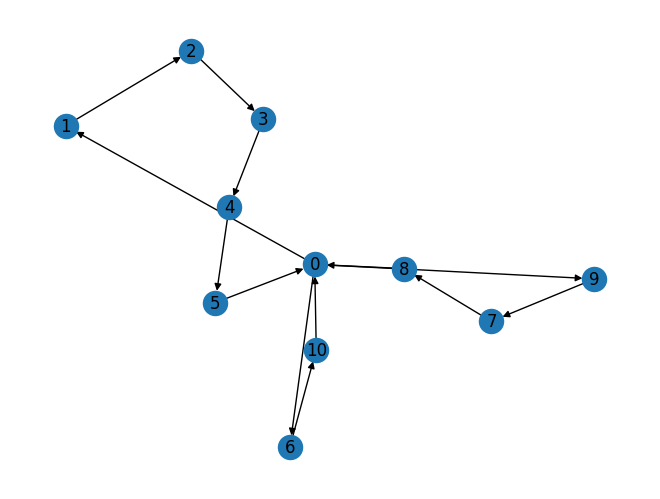

In [14]:
import networkx as nx

# Define the edges in the graph
edges = get_matrice_adjacence(route)

# Create a directed graph from the edge list
G = nx.DiGraph(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [8]:
time_window = 600

In [9]:
# genere des solution aléatoire
def get_solution_random(nombre_client):
    list_client =  [i for i in range(nombre_client)]
    random.shuffle(list_client)
    solution = get_route_version2(list_client,time_window,Q)
    return(solution)

## utiliser fonction cout pour calculer le cout d'une fonction

In [10]:
route = get_solution_random(15)

In [10]:
#route = get_solution_random(30)
print(route)
G =list(itertools.chain.from_iterable(route))
print(list(itertools.chain.from_iterable(route)))
G[8],G[9] = G[9],G[8]

print(get_route_version2(G,time_window,Q))


[[0, 1, 2, 3, 4], [8, 6, 7], [5, 9]]
[0, 1, 2, 3, 4, 8, 6, 7, 5, 9]
[[0, 1, 2, 3, 4, 8, 6, 7, 9, 5]]


In [15]:
def plot_routes(Solution, pos):
    arcs_voiture = set()
    for sous_route in Solution:
        sous_route = ["dp"]+sous_route+["dp"]
        arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

    # Define the edges in the graph
    edges = arcs_voiture

    # Create a directed graph from the edge list
    G = nx.DiGraph(edges)


    nx.draw(G, pos, with_labels=True)
    plt.show()


    

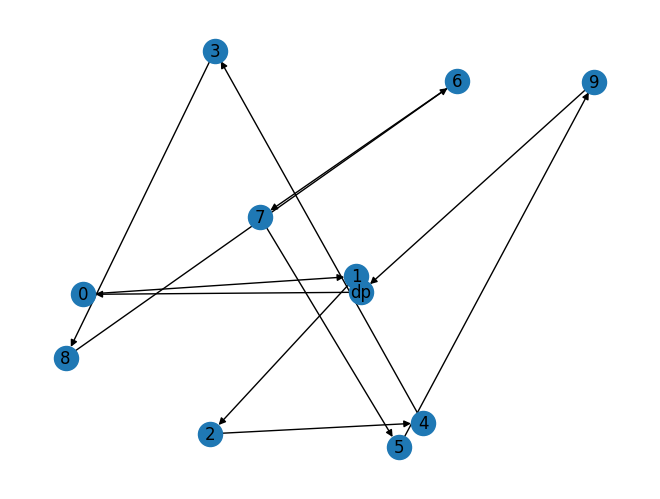

KeyboardInterrupt: 

In [18]:
import time
from IPython.display import clear_output

# Specify fixed positions for the nodes
pos = {i: (random.random(), random.random()) for i in ["dp"]+[i for i in range(15)]}
pos['dp'] = (0.5,0.5)
plot_routes(route, pos)
for i in range(14):
    clear_output(wait=True)
    
    plot_routes(get_voisinage(i,route),pos)

    time.sleep(1)

In [108]:
nombre_clients = 10
Sol_init = get_solution_random(nombre_client)

In [17]:
def get_voisinage(i,route):
    route_out = []
    if i==nombre_client-1:
        route_out =route
    else:
        G= list(itertools.chain.from_iterable(route))
        G[i],G[i+1] = G[i+1],G[i]
        route_out = get_route_version2(G,time_window,Q)
    return route_out

In [110]:
import gym
from gym import spaces
import numpy as np
n = nombre_client + 1

class DQNEnv(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Box(low=0, high=1, shape=(1,n*n))
        self.action_space = spaces.Discrete(nombre_client)
        self.state = np.array(get_matrice_adjacence(Sol_init)).reshape(n*n,)
        self.state_routes = Sol_init
        self.num_iterations = 100
        self.done = False
        
        self.pos = {i: (random.random(), random.random()) for i in ["dp"]+[i for i in range(n)]}
        self.pos['dp'] = (0.5,0.5)

    def reset(self):
        self.state = np.array(get_matrice_adjacence(Sol_init)).reshape(n*n,)
        self.state_routes = Sol_init
        self.done = False
        self.num_iterations = 100
        return self.state

    def step(self, action):
        
        #reward = cout(self.state_routes)
        self.state_routes = get_voisinage(action, self.state_routes)
        self.num_iterations-=1
        #reward =reward - cout(self.state_routes)
        reward = cout(Sol_init) - cout(self.state_routes)
        self.state = np.array(get_matrice_adjacence(self.state_routes)).reshape(n*n,)
        
        if self.num_iterations==0:
            self.done = True
        else:
            self.done = False
        return self.state, reward, self.done, {}
        
    def render(self):
        
        clear_output()
    
        plot_routes(self.state_routes, self.pos)
        
        time.sleep(0.1)
        
        
        

        

        

In [111]:
env = DQNEnv()
np.shape(env.reset())


(121,)

KeyboardInterrupt: 

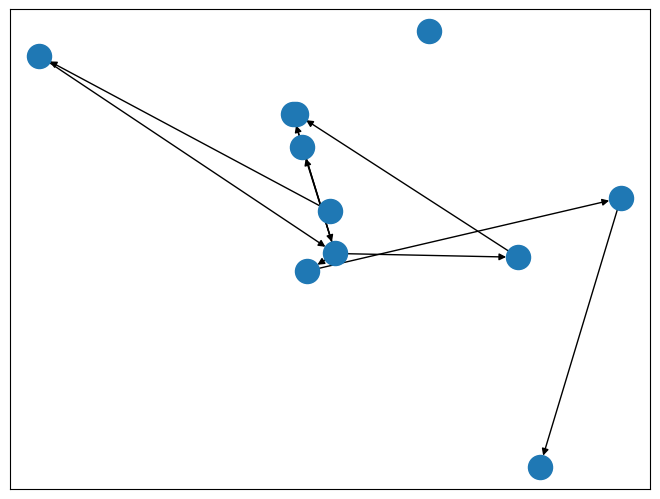

In [107]:


episodes = 3
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

In [112]:
def build_model(nombre_client):
    model = Sequential()
    model.add(Flatten(input_shape=(1,(nombre_client+1)*(nombre_client+1))))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(nombre_client, activation='linear'))
    return model


In [113]:
model = build_model(nombre_client)

In [114]:
model(state.reshape(1,11*11))

<tf.Tensor 'sequential_4/dense_14/BiasAdd:0' shape=(1, 10) dtype=float32>

In [115]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

model = build_model(nombre_client)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 121)               0         
                                                                 
 dense_15 (Dense)            (None, 24)                2928      
                                                                 
 dense_16 (Dense)            (None, 24)                600       
                                                                 
 dense_17 (Dense)            (None, 10)                250       
                                                                 
Total params: 3,778
Trainable params: 3,778
Non-trainable params: 0
_________________________________________________________________


In [116]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [117]:
dqn = build_agent(model, nombre_client)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=20000, visualize=False, verbose=1)

D:\Documents\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 20000 steps ...
Interval 1 (0 steps performed)


D:\Documents\anaconda3\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



    1/10000 [..............................] - ETA: 58:50 - reward: -83.1644

D:\Documents\anaconda3\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 130s 13ms/step - reward: -49.9432
100 episodes - episode_reward: -4994.320 [-15573.083, 16586.027] - loss: 100746.251 - mae: 1991.211 - mean_q: 2394.508

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 131s 13ms/step - reward: -50.5101
done, took 260.485 seconds


In [26]:
A = np.array([[3,2],[7,8]])
np.shape((A.reshape(4,)))

(4,)

In [118]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 18699.283, steps: 100
Episode 2: reward: 18699.283, steps: 100
Episode 3: reward: 18699.283, steps: 100
Episode 4: reward: 18699.283, steps: 100
Episode 5: reward: 18699.283, steps: 100
Episode 6: reward: 18699.283, steps: 100
Episode 7: reward: 18699.283, steps: 100
Episode 8: reward: 18699.283, steps: 100
Episode 9: reward: 18699.283, steps: 100
Episode 10: reward: 18699.283, steps: 100
Episode 11: reward: 18699.283, steps: 100
Episode 12: reward: 18699.283, steps: 100
Episode 13: reward: 18699.283, steps: 100
Episode 14: reward: 18699.283, steps: 100
Episode 15: reward: 18699.283, steps: 100
Episode 16: reward: 18699.283, steps: 100
Episode 17: reward: 18699.283, steps: 100
Episode 18: reward: 18699.283, steps: 100
Episode 19: reward: 18699.283, steps: 100
Episode 20: reward: 18699.283, steps: 100
Episode 21: reward: 18699.283, steps: 100
Episode 22: reward: 18699.283, steps: 100
Episode 23: reward: 18699.283, steps: 100
Episode 24: re

In [119]:
episodes = 1
for episode in range(1, episodes+1):
    state = env.reset()
    print(cout(env.state_routes))
    done = False
    score = 0 
    while not done:
        #env.render()
        print(cout(env.state_routes))
        action =np.argmax(dqn.model.predict((env.state).reshape([1,1,n*n])))
        n_state, reward, done, info = env.step(action)
        print(action)
        
    print('Episode:{} Score:{}'.format(episode, score))

805.4452195676744
805.4452195676744
0
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
618.4523852038272
9
61

827.2708861044231
[0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0]
739.9946804344802


In [99]:
env.reset()

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [100]:
print(cout(env.state_routes))

1029.0434784025833


In [101]:
action = 4
state = env.step(action)[0]
cout(env.state_routes)

826.0293485904407

In [102]:
env.step(action)
cout(env.state_routes)

1029.0434784025833